# Project Name: House Prices - Advance Regression Techniques

The main aim of this project is to predict house price based on various factors.
    
##### Dataset has been taken from kaggle website   

##  Life Cycle of the Project:
    1.Data Analysis
    2.Feature Engineering
    3.Feature Selection
    4.Model Building
    5.Model Deployment

## Pre - Modelling (Exploratory Data Analysis)

In [411]:
# Data Analysis Phase

# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [412]:
# Reading the data 
dataset = pd.read_csv('D:/Business Analytics/PYTHON/Projects/House Pricing/train.csv',sep=',')

# No. of rows and columns
print(dataset.shape)

(1460, 81)


In [413]:
# Top 5 record
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [327]:
# Converting the variables from numerical to categorical
dataset['MSSubClass'] = dataset.MSSubClass.astype(str)
#dataset['OverallQual'] = dataset.OverallQual.astype(str)
#dataset['OverallCond'] = dataset.OverallCond.astype(str)

### In Data Analysis we will analyse the following:
    1.Missing Values
    2.All the numerical and categorical variable
    3.Cardinality of categorical variable
    4.Outliers
    5.Relationship between independent and dependent feature(Sale Price)


### Missing Values 

In [328]:
# Here we will check the percentage of missing values present in each feature

# We will make the list of feature which has missing values
feature_with_na =[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

# Print the feature name and percentage of missing value
for feature in feature_with_na:
    print(feature,':',np.round(dataset[feature].isnull().mean(),4), '%')

LotFrontage : 0.1774 %
Alley : 0.9377 %
MasVnrType : 0.0055 %
MasVnrArea : 0.0055 %
BsmtQual : 0.0253 %
BsmtCond : 0.0253 %
BsmtExposure : 0.026 %
BsmtFinType1 : 0.0253 %
BsmtFinType2 : 0.026 %
Electrical : 0.0007 %
FireplaceQu : 0.4726 %
GarageType : 0.0555 %
GarageYrBlt : 0.0555 %
GarageFinish : 0.0555 %
GarageQual : 0.0555 %
GarageCond : 0.0555 %
PoolQC : 0.9952 %
Fence : 0.8075 %
MiscFeature : 0.963 %


Since there is lot of missing values, we need to look at the relationship between missing values and Sales Price by ploting a bar char for this relationship.

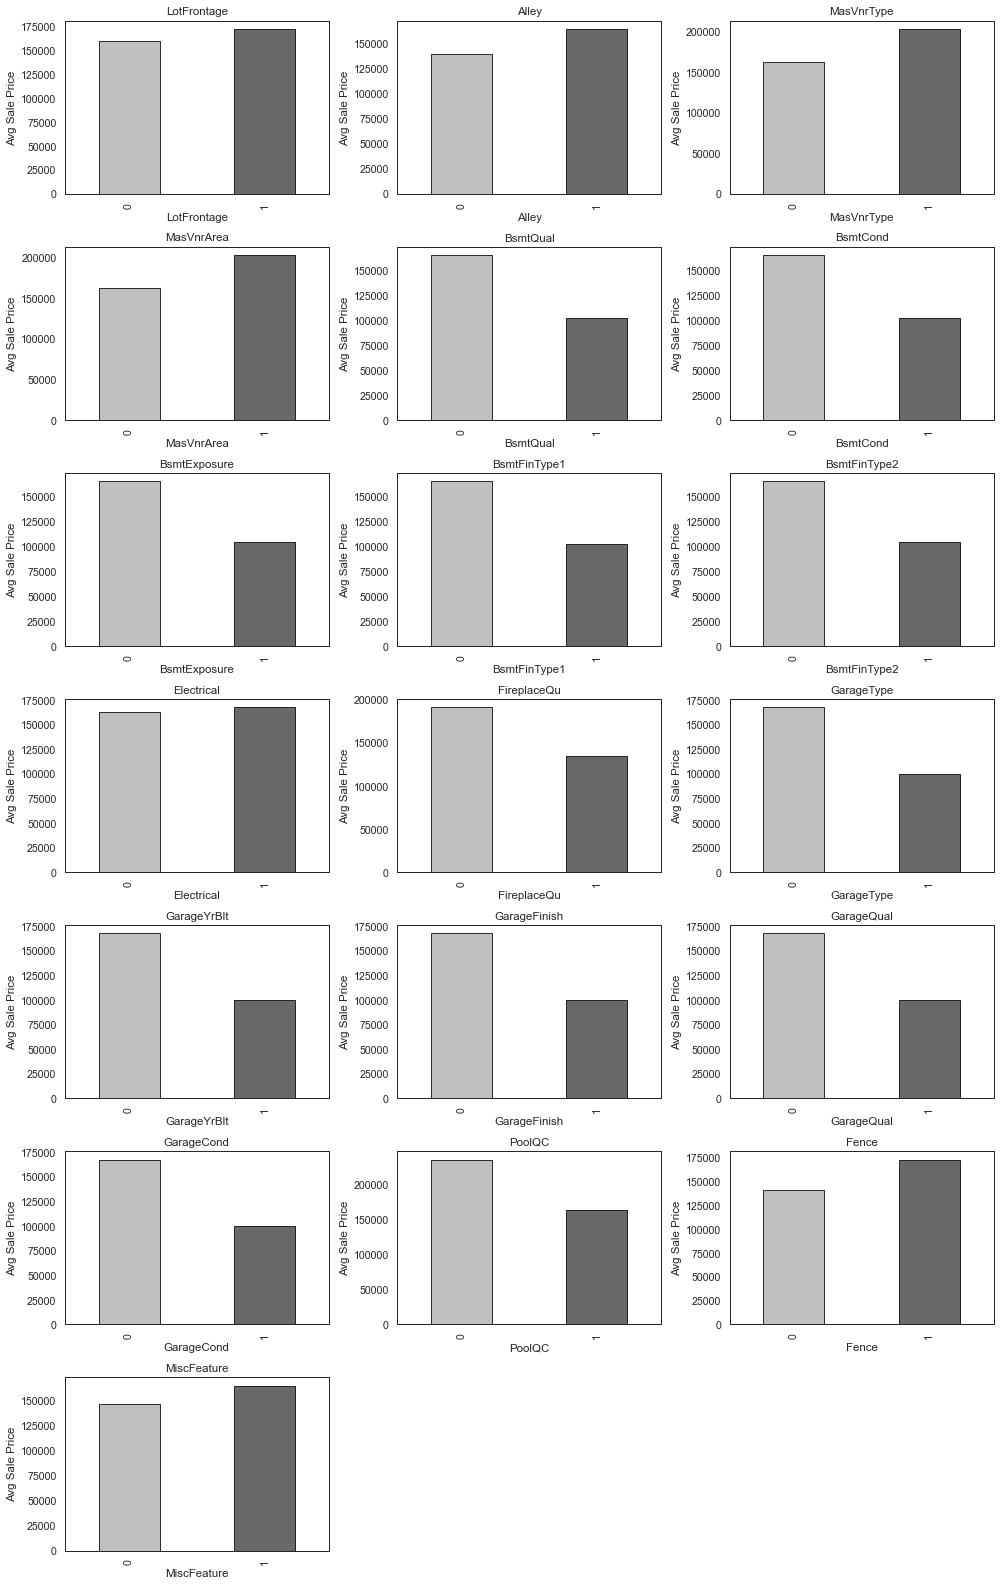

In [329]:
plt.figure(figsize=(14,22))
for i,feature in enumerate(feature_with_na):
    data=dataset.copy()

    # Assigning 1 if the observation is missing and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    plt.subplot(7,3,i+1)
    plt.tight_layout()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['silver','dimgray'],width=0.45,edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('Avg Sale Price')
    plt.title(feature)


Here the **relationship** between the **missing values and dependent variable** is clearly **visible**. So we need to replace these missing values with something meaningful.

From the above dataset some features like **Id** is **not required**.

In [330]:
dataset.drop(columns=['Id'],inplace=True)

### Numerical Variables:

In [331]:
# List of numerical Variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

# No. of numerical variable
print('Number of numerical features: ',len(numerical_features))

# Numerical Data
dataset[numerical_features].head()

Number of numerical features:  36


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variable (DateTime Variable)
- From the above dataset we have 4 year variable.
- Some year variables are **YearBuilt, YearRemodAdd, MoSold, YrSold**.
- We can derive some information from these variables like:-
    - How old is the House
    - Whether modified or not

In [332]:
# List of variables that contains year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

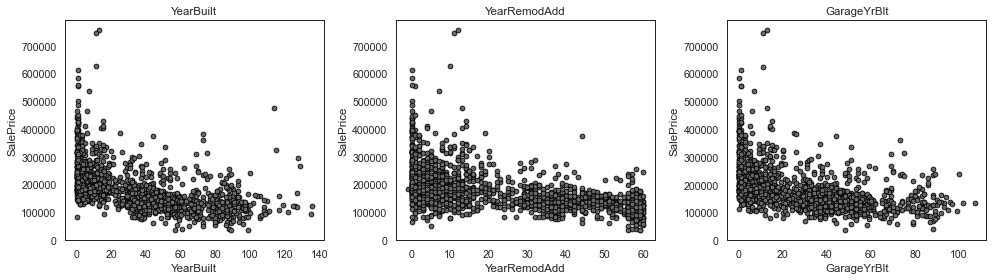

In [333]:
# Here we will compare SalePrice of other year variable with SalePrice of Year Sold
plt.figure(figsize=(14,4))
for i,feature in enumerate(year_feature):
    if feature != 'YrSold':
        data = dataset.copy()
        
        # Finding the difference between Year Sold and other variable
        data[feature] = data['YrSold']-data[feature]
        
        # Scatter plot                
        plt.subplot(1,3,i+1)
        plt.tight_layout()
        plt.scatter(data[feature],data['SalePrice'],color='dimgray',edgecolor='k')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        #plt.show()

In the above diagrams we can clearly see that there is some kind of relationship between the **SalePrice** and **Number of Years** built

In [334]:
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature]
print('Discrete variable count:',len(discrete_feature))

Discrete variable count: 16


In [335]:
dataset[discrete_feature].head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


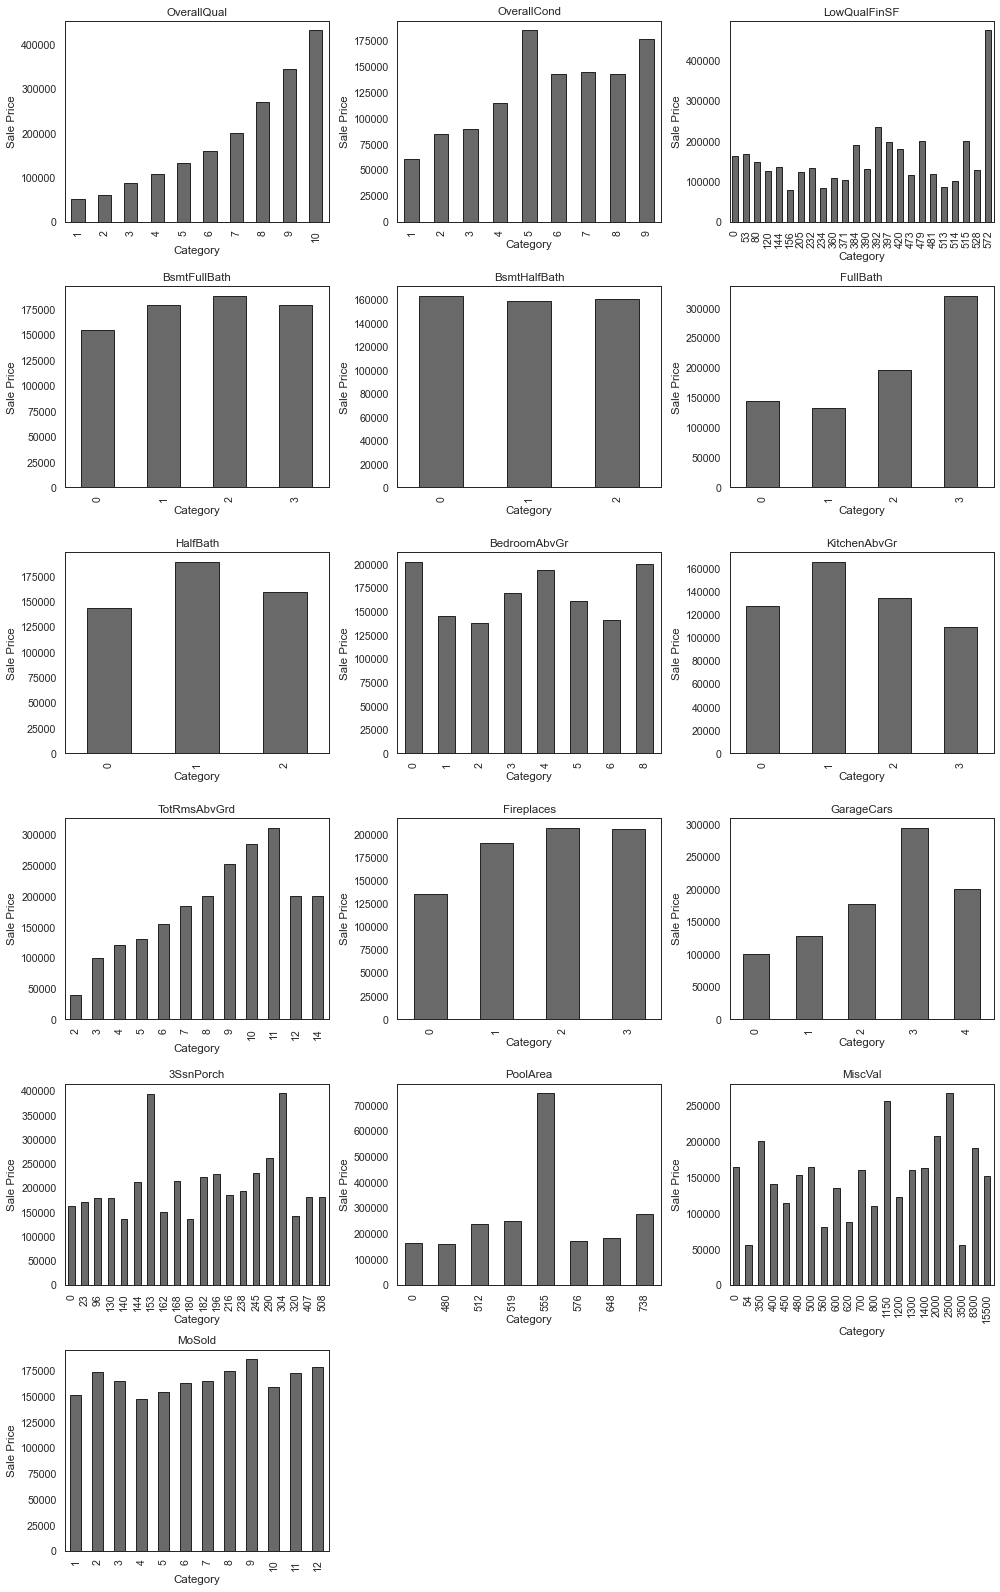

In [440]:
# Comparing all the discrete variable with SalePirce
plt.figure(figsize=(14,22))
for i,feature in enumerate(discrete_feature):
    data=dataset.copy()
    
    plt.subplot(6,3,i+1)
    plt.tight_layout()
    data.groupby(feature)['SalePrice'].median().plot.bar(color='dimgray',edgecolor='k')
    plt.xlabel('Category')
    plt.ylabel('Sale Price')
    plt.title(feature)
    #plt.show()

We can clearly observe from the above bar chart that there are few discrete features like **OverallQual, OverallCond, FullBath, TotRmsAbvGrd, Fireplace, GarageCars** which have some kind of relationship with **SalePrice**.

In [337]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print('Continuous variables count: ', len(continuous_feature))

Continuous variables count:  16


In [338]:
# Exploring numerical Variable
def var_summary(x):
    return pd.Series([x.median(),x.mean(),x.std(),x.var(),x.std()/x.mean(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['Median','Mean','Std','Var','CV','Min','P1','P5','P25','P50','P75','P95','P99','Max'])

num_summary = dataset[continuous_feature].apply(lambda x: var_summary(x)).T
num_summary

,Median,Mean,Std,Var,CV,Min,P1,P5,P25,P50,P75,P95,P99,Max
LotFrontage,69.0,70.049958,24.284752,5.897492e+02,0.346678,21.0,21.00,34.00,59.00,69.0,80.00,107.00,141.00,313.0
LotArea,9478.5,10516.828082,9981.264932,9.962565e+07,0.949076,1300.0,1680.00,3311.70,7553.50,9478.5,11601.50,17401.15,37567.64,215245.0
MasVnrArea,0.0,103.685262,181.066207,3.278497e+04,1.746306,0.0,0.00,0.00,0.00,0.0,166.00,456.00,791.92,1600.0
BsmtFinSF1,383.5,443.639726,456.098091,2.080255e+05,1.028082,0.0,0.00,0.00,0.00,383.5,712.25,1274.00,1572.41,5644.0
BsmtFinSF2,0.0,46.549315,161.319273,2.602391e+04,3.465556,0.0,0.00,0.00,0.00,0.0,0.00,396.20,830.38,1474.0
BsmtUnfSF,477.5,567.240411,441.866955,1.952464e+05,0.778977,0.0,0.00,0.00,223.00,477.5,808.00,1468.00,1797.05,2336.0
TotalBsmtSF,991.5,1057.429452,438.705324,1.924624e+05,0.414879,0.0,0.00,519.30,795.75,991.5,1298.25,1753.00,2155.05,6110.0
1stFlrSF,1087.0,1162.626712,386.587738,1.494501e+05,0.332512,334.0,520.00,672.95,882.00,1087.0,1391.25,1831.25,2219.46,4692.0
2ndFlrSF,0.0,346.992466,436.528436,1.905571e+05,1.258034,0.0,0.00,0.00,0.00,0.0,728.00,1141.05,1418.92,2065.0
GrLivArea,1464.0,1515.463699,525.480383,2.761296e+05,0.346746,334.0,692.18,848.00,1129.50,1464.0,1776.75,2466.10,3123.48,5642.0


### Distribution of the Continuous Variables

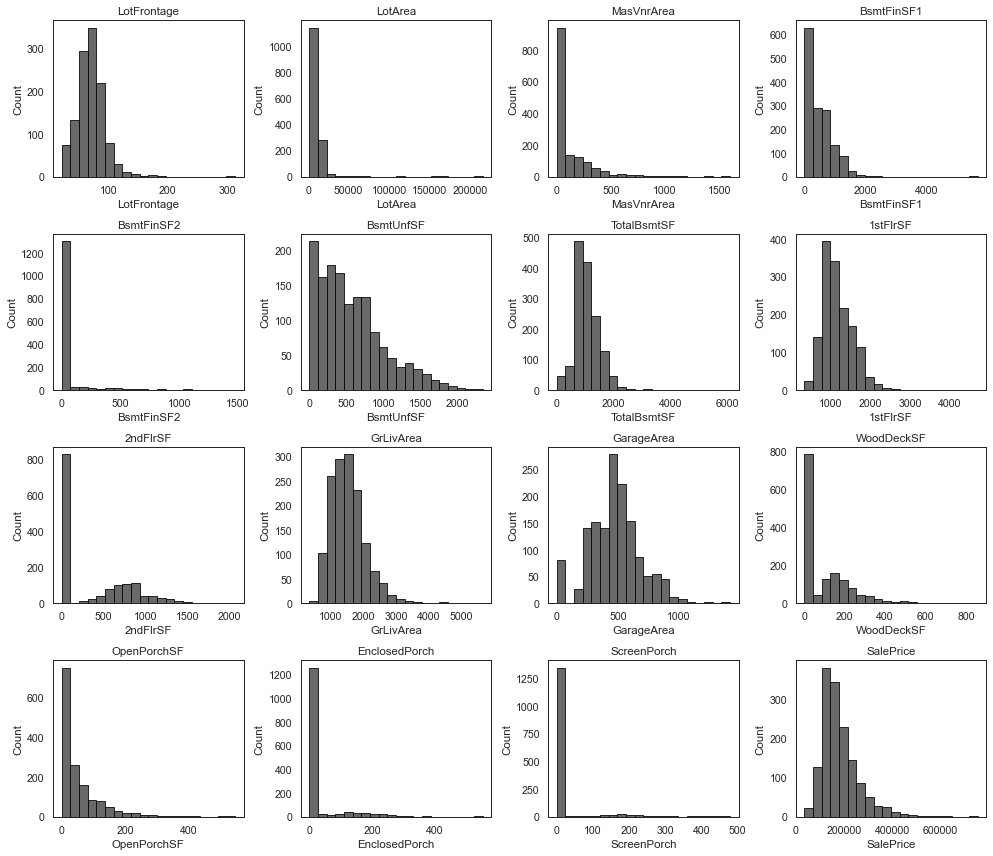

In [339]:
plt.figure(figsize=(14,12))
for i,feature in enumerate(continuous_feature):
    data = dataset.copy()
    
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    data[feature].hist(bins=20,color = "dimgray",edgecolor='k',grid=False)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    #plt.show()
    

In the above diagram
- Most of the variables are **skewed**
- **SalePrice**(dependent) variable is also not following **Normal Distribution**

In [340]:
# Continuous feature without zero
cont_feat_without_0 = [feature for feature in continuous_feature if 0 not in dataset[feature].unique()]

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

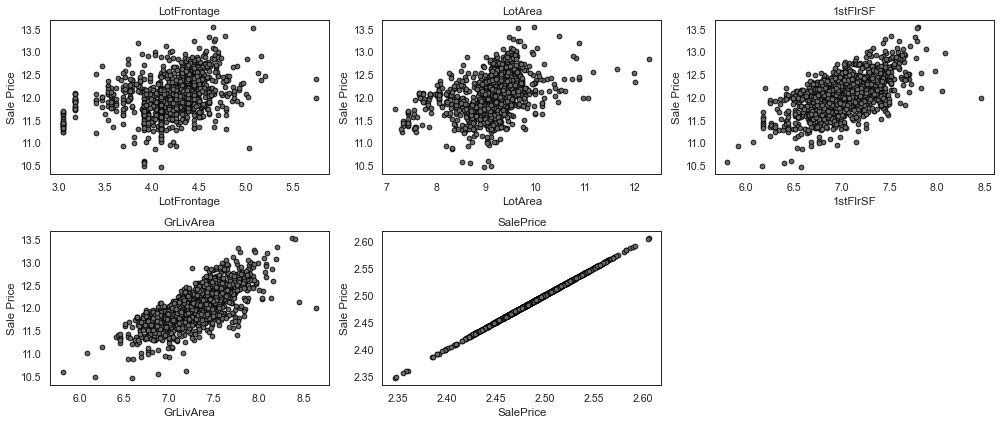

In [341]:
# Relationship after Log Transformation 

plt.figure(figsize=(14,6))
for i,feature in enumerate(cont_feat_without_0):
    data = dataset.copy()
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.scatter(data[feature], data['SalePrice'],color="dimgray",edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    #plt.show()


From the above scatter plots we can conclude that **Continuous Features** have some relationship with **SalePrice**.

### Outliers

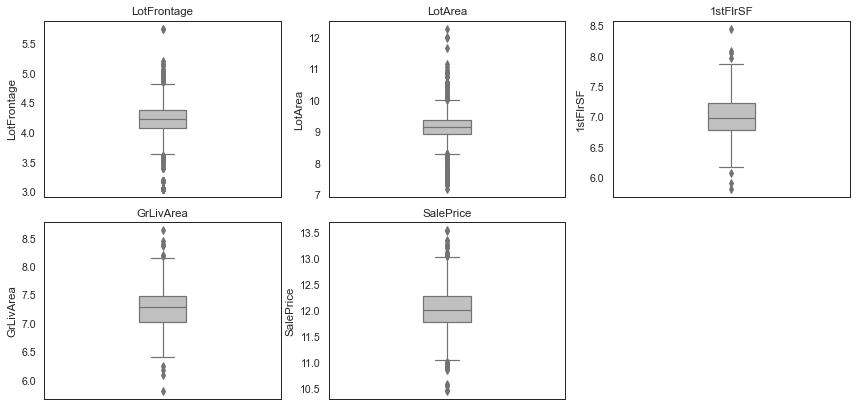

In [342]:
plt.figure(figsize=(12,6))
for i,feature in enumerate(cont_feat_without_0):
    data = dataset.copy()
    
    data[feature] = np.log(data[feature])
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    sns.boxplot(y=data[feature],width=0.2,color='silver')
    sns.set_style('white')
    #sns.set_context('paper',font_scale=1.2)
    #data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    #plt.show()

We can observed from the above diagrams that there are lot of outliers in almost all variables.

### Categorical Variable

In [343]:
categorical_variable = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [344]:
dataset[categorical_variable].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [345]:
# Checking for the number of categories each categorical variable has
print('Number of Categories')
for feature in categorical_variable:
    print(feature,':',len(dataset[feature].unique()))

Number of Categories
MSSubClass : 15
MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6


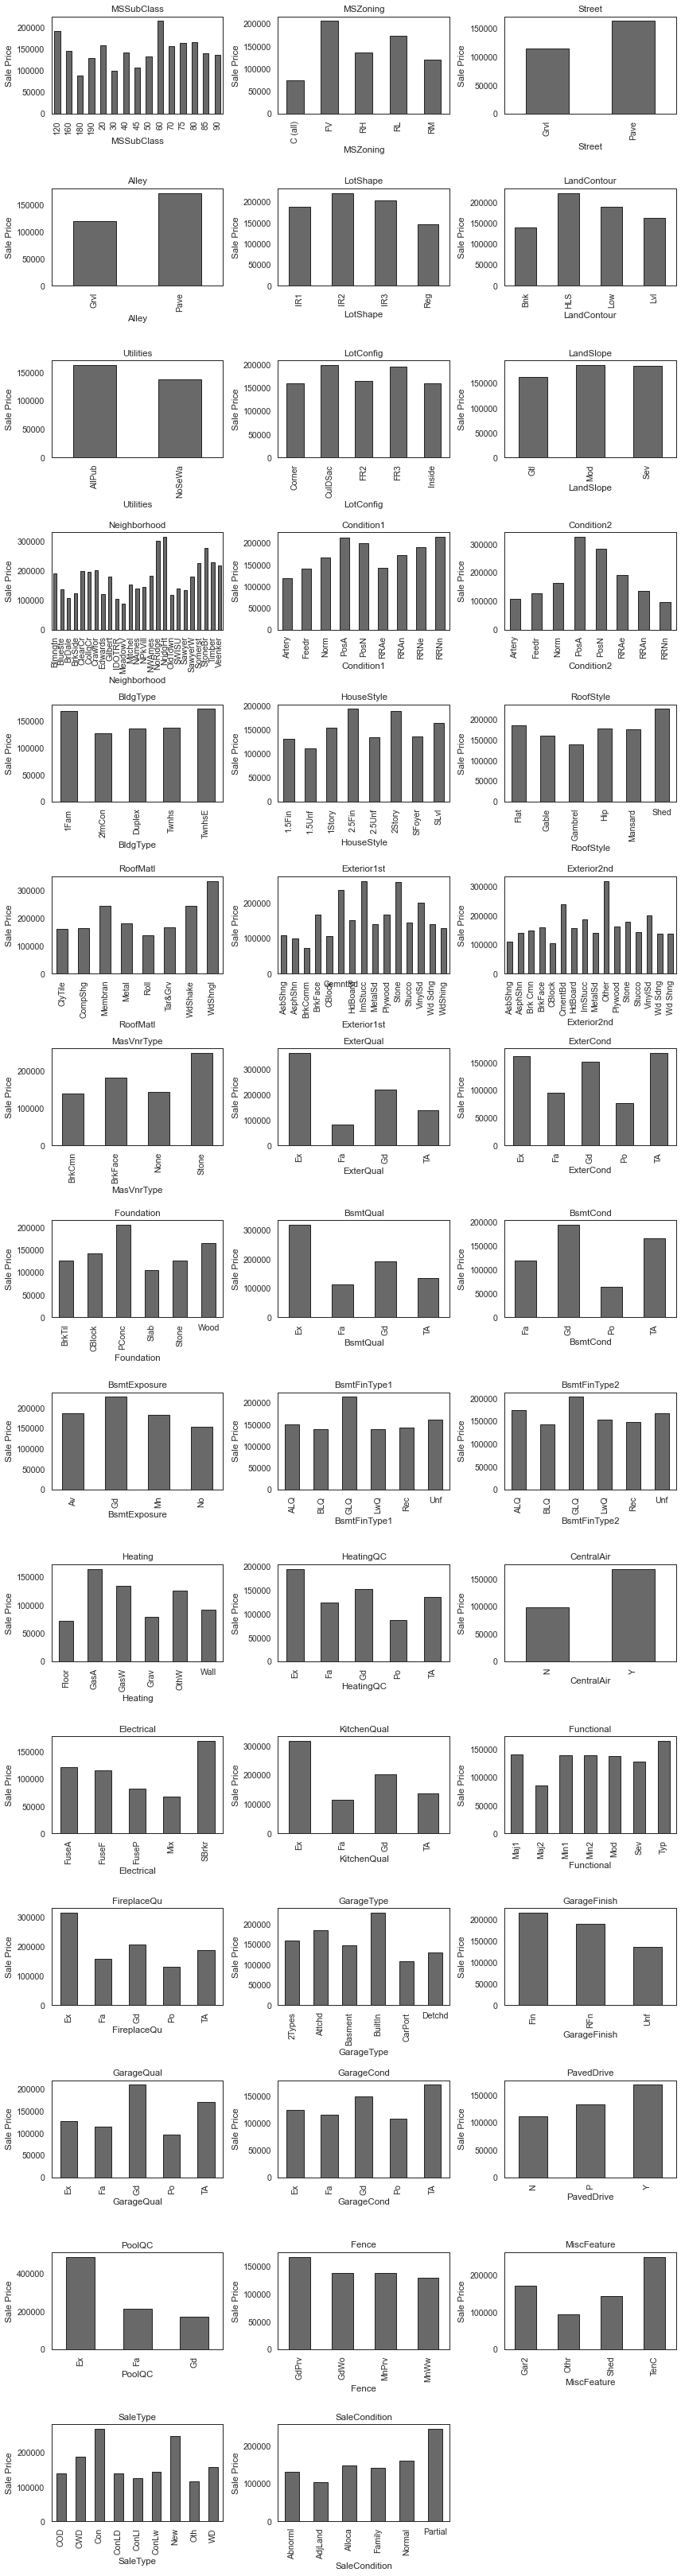

In [346]:
# Finding the relationship of categorical variables with dependent variable
plt.figure(figsize=(12,45))
for i,feature in enumerate(categorical_variable):
    data = dataset.copy()
    
    plt.subplot(15,3,i+1)
    plt.tight_layout()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=["dimgray"],edgecolor='k')
    plt.ylabel('Sale Price')
    plt.xlabel(feature)
    plt.title(feature)
    #plt.show()

## Modelling

## Feature Engineering (Data Preparation 1)

### Missing Value

In [347]:
# Finding all categorical feature which have missing
cat_feature_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtype=='O']
cat_feature_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [348]:
# Replacing missing values in Categorical Variables
# Function to replace NaN 
def replace_cat(x):
    x = x.fillna('missing')
    return x

# Replacing the NaN value with the 'missing' label
dataset[cat_feature_nan] = dataset[cat_feature_nan].apply(replace_cat)
dataset[cat_feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [349]:
dataset.FireplaceQu.isnull().sum()

0

In [350]:
# Finding all the numerical variable which have missing
num_feature_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']
num_feature_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [351]:
# Replacing missing values in Numerical Variables
# Function to replace Nan
def replace_num(x):
    x = x.fillna(x.median())
    return x
    
# Replacing the NaN in the numerival variable with the median
dataset[num_feature_nan] = dataset[num_feature_nan].apply(replace_num)
dataset[num_feature_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Temporal Variable (Date Time Variable)
Deriving new information from the **year** column by subtracting it from the **year sold** columns

In [352]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[feature] = dataset['YrSold'] - dataset[feature]

In [353]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


### Outliers Treatment

In [354]:
def outliers_treat(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x   

In [355]:
dataset[continuous_feature] = dataset[continuous_feature].apply(outliers_treat)

### Transformation of dependent and independent variable

In [356]:
# Getting those numerical variables which does not have any 0 records
feature_without_0 = [feature for feature in continuous_feature if len(dataset[dataset[feature]==0])<1]
feature_without_0

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [357]:
# Applying log transformation on variable which does not have 0's
for feature in feature_without_0:
    dataset[feature] = np.log(dataset[feature])

### Correlation Heat Map

In [358]:
# Creating Correlation Matrix
cormat = dataset[numerical_features].corr()

# Creating Label for the Heat Map
label=np.round(np.asarray(cormat),2)

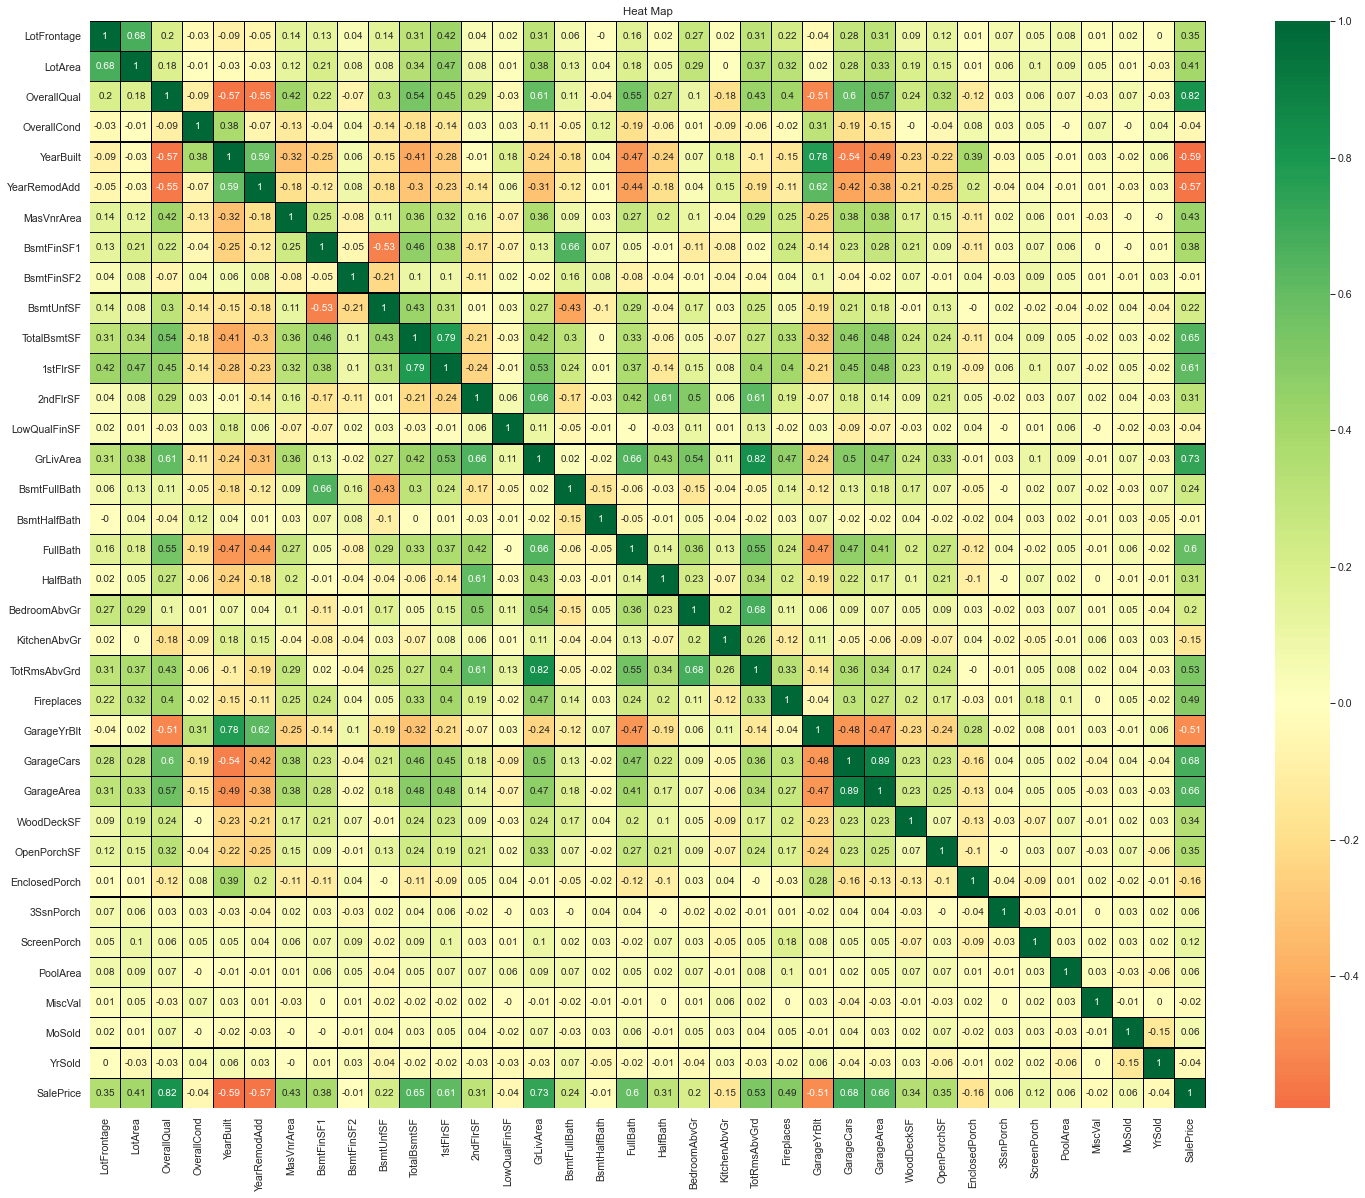

In [359]:
# Define the plot
plt.figure(figsize=(25,20))
sns.heatmap(cormat, cmap='RdYlGn', annot=label, linewidths=0.3, linecolor='black',center=0)

#Add the title
plt.title('Heat Map')
plt.show()

Some of the observation  from the above **Correlation Heat Map** are as follows:-

**Multicollinear Features:**
- GarageArea
- TotRmsAbvGrd
- 2ndFlrSF
- 1stFlrSF
- BedroomAbvGr
- FullBath
- BsmtFinSF1
- GarageYrBlt
- YearRemodAdd
- LotFrontage

**Correlation with SalePrice < 0.1:**
- OverallCond
- LowQualFinSF
- BsmtHalfBath
- 3SsnPorch
- PoolArea
- MiscVal
- MoSold
- BsmtFinSF2
- YrSold

Now we will reduce those features which **does not correlate with SalePrice(Y)** and cotribute to **Multicollinearity**.

In [360]:
#Multicollinear and Non-correlated Features
multicoll_feature = ['YrSold','LotFrontage','YearRemodAdd','GarageYrBlt','GarageArea','TotRmsAbvGrd','2ndFlrSF','1stFlrSF','BedroomAbvGr','FullBath','BsmtFinSF1','OverallCond','LowQualFinSF','BsmtHalfBath','3SsnPorch','PoolArea','MiscVal','MoSold','BsmtFinSF2']

In [361]:
# Droping Multicollinear and Non-correlated Features 
dataset.drop(columns=multicoll_feature, inplace = True)

### Encoding of Categorical Variable

There are some variables like **Neighborhood, Exterior1st and Exterior2nd** which have lot of categories. So we'll reduce these category with something meaningful

In [362]:
# Dividing Neighborhood into East, West, North, South
temp_nhood = {'CollgCr':'West', 'Veenker':'North', 'Crawfor':'South', 'NoRidge':'North', 'Mitchel':'East', 'Somerst':'North',
           'NWAmes':'North', 'OldTown':'East', 'BrkSide':'East', 'Sawyer':'West', 'NridgHt':'North', 'NAmes':'East',
           'SawyerW':'West', 'IDOTRR':'East', 'MeadowV':'East', 'Edwards':'West', 'Timber':'South', 'Gilbert':'North',
           'StoneBr':'North', 'ClearCr':'West', 'NPkVill':'North', 'Blmngtn':'North', 'BrDale':'North', 'SWISU':'South',
           'Blueste':'South'}
# Applying temp_nhood dict to Neighborhood variable
dataset['Neighborhood'] = dataset.Neighborhood.map(temp_nhood)

In [363]:
# Correcting the spelling in Exterior2nd
dataset.Exterior2nd[dataset.Exterior2nd=='Wd Shng'] = str('WdShing') 
dataset.Exterior2nd[dataset.Exterior2nd=='CmentBd'] = str('CemntBd') 
dataset.Exterior2nd[dataset.Exterior2nd=='Brk Cmn'] = str('BrkComm') 

# Encoding 1 where Exterior1st!=Exterior2nd else 0 
dataset['Exterior2nd'] = np.where(dataset.Exterior1st!=dataset.Exterior2nd,1,0)


<ipython-input-363-29c1cd54e18e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Exterior2nd[dataset.Exterior2nd=='Wd Shng'] = str('WdShing')
<ipython-input-363-29c1cd54e18e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Exterior2nd[dataset.Exterior2nd=='CmentBd'] = str('CemntBd')
<ipython-input-363-29c1cd54e18e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Exterior2nd[dataset.Exterior2nd=='Brk Cmn'] = s

In [364]:
# Ordinal Variables
ordinal_variable =['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
'GarageQual','GarageCond','PoolQC', 'BsmtFinType1','BsmtFinType2', 'BsmtExposure','GarageFinish','Fence','PavedDrive']

In [365]:
# Encoding Ordinal variables 
temp_ordi = {'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'No':1,'Mn':2,'Av':3,
             'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6,'RFn':2,'Fin':3,
             'N':0,'P':1,'Y':2,'MnWw':1, 'GdWo':2,'MnPrv':3, 'GdPrv':4 }

for feature in ordinal_variable:
    dataset[feature] = dataset[feature].map(temp_ordi)

In [366]:
#ordinal_variable = ordinal_variable +['OverallQual','OverallCond']

In [367]:
# Nominal Variables
nominal_variable = [feature for feature in categorical_variable if feature not in ordinal_variable and feature!='Exterior2nd']

In [368]:
# Encoding Nominal variable
dataset = pd.get_dummies(columns=nominal_variable, data = dataset, drop_first=True)

In [369]:
dataset.head()

,LotArea,OverallQual,YearBuilt,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_North,Neighborhood_South,Neighborhood_West,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_missing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_missing,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.041922,7,5,0,196.0,4,3,4,3,1,6,1,150.0,856.0,5,7.444249,1,1,1,4,0,0,2,2,3,3,2,0.0,61.0,0.00,0.0,0,0,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9.169518,6,31,0,0.0,3,3,4,3,4,5,1,284.0,1262.0,5,7.140453,0,0,1,3,1,3,2,2,3,3,2,298.0,0.0,0.00,0.0,0,0,12.109011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,9.328123,7,7,0,162.0,4,3,4,3,2,6,1,434.0,920.0,5,7.487734,1,1,1,4,1,3,2,2,3,3,2,0.0,42.0,0.00,0.0,0,0,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,9.164296,7,91,1,0.0,3,3,3,4,1,5,1,540.0,756.0,4,7.448334,1,0,1,4,1,4,1,3,3,3,2,0.0,35.0,261.05,0.0,0,0,11.849398,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0

### Spliting Data into Training and Testing

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
train,test = train_test_split(dataset, test_size = 0.2, random_state=222)

## Feature Selection (Data Preparation 2)

### Correlation

In [372]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_rows',None)

In [373]:
corr_feature = train.columns
corr_y = train[corr_feature].corrwith(train.SalePrice)
corr_y.head()

LotArea        0.386701
OverallQual    0.817106
YearBuilt     -0.585466
Exterior2nd   -0.060692
MasVnrArea     0.416671
dtype: float64

List of **selected features** based on **correlation** with **SalePrice**.

In [374]:
correlated_features = list(corr_y.abs().sort_values(ascending=False)[corr_y.abs().sort_values(ascending=False)>0.2].index)

In [375]:
train = train[correlated_features]

### F - Regression

In [376]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway

In [377]:
train_feature = train.columns.difference(['SalePrice'])
x = train[train_feature]
y = train['SalePrice']

In [378]:
F_values, p_values = f_regression( x, y)

In [379]:
f_reg_result = pd.concat([pd.Series(x.columns),pd.Series(F_values),pd.Series(p_values)], axis=1)
f_reg_result.columns = ['Features', 'F_value', 'P_value']


In [380]:
f_reg_result.sort_values('F_value', ascending=False, inplace=True)

In [381]:
f_reg_result.head()

,Features,F_value,P_value
39,OverallQual,2342.482277,3.441477e-281
22,GrLivArea,1300.559481,6.353337e-192
14,GarageCars,1021.357426,1.759880e-161
8,ExterQual,978.701508,1.725009e-156
26,KitchenQual,971.849677,1.116374e-155


In [382]:
f_reg_result.to_csv('F_Reg_Result.csv')

### Recursive Feature Elemination (RFE)

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
rfe_model = RFE(LinearRegression(),n_features_to_select=20)

In [385]:
rfe_model = rfe_model.fit(x,y)

In [386]:
rfe_model.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True, False, False,
       False])

In [387]:
rfe_selected_variables = x.columns[list(rfe_model.get_support())]

In [388]:
pd.Series(rfe_selected_variables)

0              BsmtFullBath
1                  BsmtQual
2              CentralAir_Y
3                GarageCars
4                GarageQual
5         GarageType_Attchd
6        GarageType_BuiltIn
7         GarageType_Detchd
8        GarageType_missing
9                 GrLivArea
10              KitchenQual
11                  LotArea
12            MSSubClass_30
13              MSZoning_RM
14       MasVnrType_BrkFace
15          MasVnrType_None
16         MasVnrType_Stone
17              OverallQual
18    SaleCondition_Partial
19             SaleType_New
dtype: object

### SelectKBest

In [389]:
selectkbest = SelectKBest(f_oneway,k=20)

In [390]:
selectkbest = selectkbest.fit(x,y)

In [391]:
selectkbest.get_support()

array([False, False, False, False, False, False,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False])

In [392]:
selectkbest_selected_var=pd.Series(x.columns[list(selectkbest.get_support())])
selectkbest_selected_var

0              CentralAir_Y
1          Electrical_SBrkr
2       Exterior1st_VinylSd
3         Foundation_CBlock
4          Foundation_PConc
5        GarageType_BuiltIn
6         GarageType_Detchd
7        GarageType_missing
8                  HalfBath
9         HouseStyle_2Story
10             LotShape_Reg
11            MSSubClass_30
12            MSSubClass_60
13              MSZoning_RL
14              MSZoning_RM
15       MasVnrType_BrkFace
16         MasVnrType_Stone
17       Neighborhood_North
18    SaleCondition_Partial
19             SaleType_New
dtype: object

We will take top 20 variables from each technique and combine it to extract unique variables.
Then we will further reduce the variable using **Variance Inflation Factor** to remove multicollinearity

### Variance Inflation Factor (VIF)

In [393]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [394]:
x_new = x[['OverallQual','GrLivArea','GarageCars','ExterQual','KitchenQual','TotalBsmtSF','BsmtQual','GarageFinish','YearBuilt','FireplaceQu','Foundation_PConc','Fireplaces','HeatingQC','Neighborhood_North','MasVnrArea','GarageType_Attchd','MSSubClass_60','LotArea','MasVnrType_None','GarageType_Detchd','BsmtFullBath','CentralAir_Y','GarageQual','GarageType_BuiltIn','GarageType_missing','MSSubClass_30','MSZoning_RM','MasVnrType_BrkFace','MasVnrType_Stone','SaleCondition_Partial','SaleType_New','Electrical_SBrkr','Exterior1st_VinylSd','Foundation_CBlock','HalfBath','HouseStyle_2Story','LotShape_Reg','MSZoning_RL'
]]

In [395]:
x_new = x_new[x_new.columns.difference(['HouseStyle_2Story','GarageFinish','CentralAir_Y','TotalBsmtSF','GarageCars','FireplaceQu','Foundation_CBlock','MSZoning_RL','GarageType_Attchd','HeatingQC','Electrical_SBrkr','BsmtQual','MasVnrType_None','GrLivArea','GarageQual','SaleCondition_Partial','OverallQual','ExterQual','KitchenQual','LotArea'])]

In [396]:
vif = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]

In [397]:
vif_res = pd.concat([pd.Series(x_new.columns), pd.Series(vif)],axis=1)

In [398]:
vif_res.columns = ['Features','VIF_Score']
vif_res.sort_values(by='VIF_Score',ascending=False)

,Features,VIF_Score
17,YearBuilt,4.258216
3,Foundation_PConc,3.242993
12,MasVnrArea,2.881084
13,MasVnrType_BrkFace,2.871929
8,LotShape_Reg,2.816543
7,HalfBath,2.617379
10,MSSubClass_60,2.489415
1,Exterior1st_VinylSd,2.429297
2,Fireplaces,2.331252
5,GarageType_Detchd,2.212951


In [399]:
# Final list of column to be included
x_new.columns

Index(['BsmtFullBath', 'Exterior1st_VinylSd', 'Fireplaces', 'Foundation_PConc',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_missing',
       'HalfBath', 'LotShape_Reg', 'MSSubClass_30', 'MSSubClass_60',
       'MSZoning_RM', 'MasVnrArea', 'MasVnrType_BrkFace', 'MasVnrType_Stone',
       'Neighborhood_North', 'SaleType_New', 'YearBuilt'],
      dtype='object')

In [400]:
# Train Data after variable selection
train_new = pd.concat([x_new,y],axis=1)
train_new.head()

,BsmtFullBath,Exterior1st_VinylSd,Fireplaces,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_missing,HalfBath,LotShape_Reg,MSSubClass_30,MSSubClass_60,MSZoning_RM,MasVnrArea,MasVnrType_BrkFace,MasVnrType_Stone,Neighborhood_North,SaleType_New,YearBuilt,SalePrice
1179,0,0,1,0,0,0,1,0,1,0,0,0,0.0,0,0,0,0,52,11.440355
1126,0,1,1,1,0,0,0,0,1,0,0,0,130.0,1,0,1,0,2,12.066811
302,0,1,1,1,0,0,0,0,0,0,0,0,150.0,1,0,0,0,5,12.230765
466,1,0,1,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,37,12.025749
890,0,0,1,0,0,1,0,0,1,0,0,0,0.0,0,0,0,0,58,11.719126


In [401]:
# Test Data 
y_t = test['SalePrice']
test_new = pd.concat([test[x_new.columns],y_t], axis=1)

## Model Building

In [402]:
import statsmodels.formula.api as smf

In [403]:
formula = 'SalePrice' + '~' + '+'.join(train_new.columns.difference(['SalePrice','Exterior1st_VinylSd','MasVnrType_BrkFace','YearBuilt']))

In [404]:
model = smf.ols(formula, data= train_new)
model = model.fit()

In [405]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.50e-269
Time:                        17:15:18   Log-Likelihood:                 135.95
No. Observations:                1168   AIC:                            -239.9
Df Residuals:                    1152   BIC:                            -158.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.7808      0

## Model Validation

In [406]:
test_pred = np.exp(model.predict(test_new))
train_pred = np.exp(model.predict(train_new))

In [407]:
train_y = np.exp(train_new.SalePrice)
test_y = np.exp(test_new.SalePrice)

In [408]:
# Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('MAPE_train=',MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('RMSE_train=',RMSE_train)
RMSPE_train = np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('RMSPE_train=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('corr_train=',corr_train)

MAPE_train= 0.16681929453372202
RMSE_train= 44238.220531127714
RMSPE_train= 0.22986791895348604
corr_train= 0.7916448854260858


In [409]:
# Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('MAPE_test=',MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('RMSE_test=',RMSE_test)
RMSPE_test = np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('RMSPE_test=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('corr_test=',corr_test)

MAPE_test= 0.1863473522122332
RMSE_test= 45989.54102066484
RMSPE_test= 0.25874101548961953
corr_test= 0.8274396500907615


In [410]:
#plt.hist(model.resid)